## DX799S O1 Data Science Capstone (Summer 1 2025) - Milestone 2 (Weeks 8-12)
### Week 9 Notebook – Predicting Early Mortgage Delinquency

This notebook shows my Week 9 review of the Home Credit dataset as part of my capstone project on predicting early mortgage delinquency. This notebook uses gradient boosting on the Home Credit Default Risk dataset, tuning learning rate, number of estimators, tree depth, and regularization parameters to improve model performance and support early delinquency prediction for my capstone project in mortgage lending.


Source of data file Home Credit Default Risk: 
- https://www.kaggle.com/competitions/home-credit-default-risk/data?select=HomeCredit_columns_description.csv


### Assignment - Week 9 Jupyter Notebook - Gradient Boost
Each week, you will apply the concepts of that week to your Integrated Capstone Project’s dataset. In preparation for Milestone Two, create a Jupyter Notebook (similar to in Module B, Semester Two) that illustrates these lessons. There are no specific questions to answer in your Jupyter Notebook files in this course; your general goal is to analyze your data using the methods you have learned about in this course and in this program and draw interesting conclusions.  

For this week, include ideas such as gradient boost, learning rate, number of estimators, tree depth, and regularization. This homework should be submitted for peer review in the assignment titled 9.3 Peer Review: Week 9 Jupyter Notebook. Complete and submit your Jupyter Notebook homework by 11:59pm ET on Sunday. 

In Week 12, you will compile your findings from your Jupyter Notebook homework into your Milestone Two assignment for grading. For full instructions and the rubric for Milestone Two, refer to the following link. 

### Note for Peer Completing Review

Per Feedback Fruits, please review the following -- Mod C 9.3 Peer Review: Week 9 Jupyter Notebook

As part of your progress toward Milestones One and Two, you will submit work for peer review and provide feedback on a submission by a peer who has selected a different project dataset. The feedback you provide should be based on the rubric below. As you review your peer’s work:  
- Consider each category (row) 
- Select a rating for your peer's work (column) 
- Provide some direct feedback using the comments section — what should be changed or improved? 
- Share what you like about the work — what should they do more of? 

In [134]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [135]:
#load data
df = pd.read_csv("Kaggle_Home_Credit_Default_Risk__train.csv")

#preview data (first few rows)
df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
### Review data set 

#print all column names
print("columns in the dataset")
print(df.columns.tolist())

columns in the dataset
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',

In [137]:
#count missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print("\n columns with missing values, top 10")
print(missing_values.head(10))



 columns with missing values, top 10
COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
dtype: int64


In [138]:
#added to eval data shape before and after changes
print(f"\n shape of data {df.shape}")


 shape of data (307511, 122)


In [139]:
### Clean data

#drop columns =  30%+  missing values
threshold = 0.3 * len(df)
df_clean = df.dropna(thresh=threshold, axis=1)

#drop rows with any remaining missing values
df_clean = df_clean.dropna()

#drop ID column -- not needed since it doesnt contain info that will predict outcome; it is just noise 
df_clean = df_clean.drop(columns=['SK_ID_CURR'], errors='ignore')

#sep target / features
y = df_clean['TARGET']
X = df_clean.drop(columns=['TARGET'])

print("data shape - cleaned:")
print("features -", X.shape)
print("target-", y.shape)
print("columns in df_clean:")
print(df_clean.columns.tolist())
print("feature columns - X:")
print(X.columns.tolist())


data shape - cleaned:
features - (8602, 120)
target- (8602,)
columns in df_clean:
['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEA

In [140]:
#split the data into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (6881, 120)
Testing features shape: (1721, 120)
Training target shape: (6881,)
Testing target shape: (1721,)


In [141]:
#Ran into issues running radient boosting regressor since some coluimns were non-numeric
#check data types - X
print(X.dtypes.value_counts())

#confirm columns that are still non-numeric
non_numeric_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print("nonnumeric columns in X:", non_numeric_cols)


float64    65
int64      39
object     16
Name: count, dtype: int64
nonnumeric columns in X: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']


In [142]:
#remove/drop nonnumeric columns
X = X.select_dtypes(include=['number'])

#confirm non-numerics are removed/ data is clean 
print("shape of X, #s only", X.shape)
print("# oof non-numeric columns left", X.select_dtypes(exclude=['number']).columns.tolist())


shape of X, #s only (8602, 104)
# oof non-numeric columns left []


In [143]:
#split model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
    )

#train basic gradient boosting model
model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#eval performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error/MSE is  {mse:.4f}")
print(f"R-squared Score R² is  {r2:.4f}")


Mean Squared Error/MSE is  0.0496
R-squared Score R² is  0.0395


## Gradient Boosting Model - Observation

I set hyperparameters:  
- n_estimators = 100  
- learning_rate = 0.1  
- max_depth = 3 

I trained the model and then evaluated the test set and observed which resulted in MSE of 0.0496 and r-squared score R² of 0.0395. An R² value of 0.0395 means that the model is only able to explain about 4% of the differences in loan default outcomes based on the features we used. This suggests that most of the variation in the target is still unexplained. This is not unusual for the first attempt.   

Possible reasons for the low R² include the relationship between features and the target may be nonlinear or complex, key features may be missing, the model may need more depth or estimators, I may need to do more preprocessing or feature engineering. 

In [144]:
### HYPERPARAMETERS 
#trrying different combos of hyperparameters
learning_rates = [0.01, 0.1, 0.2]
n_estimators_list = [50, 100, 200]
max_depths = [2, 3, 5]

results = []

for lr in learning_rates:
    for n in n_estimators_list:
        for depth in max_depths:
            model = GradientBoostingRegressor(
                learning_rate=lr,
                n_estimators=n,
                max_depth=depth,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results.append({
                'learning_rate': lr,
                'n_estimators': n,
                'max_depth': depth,
                'MSE': mse,
                'R2': r2
            })

#convert results to DF
results_df = pd.DataFrame(results)

#sort by best R2 score & show top 10
results_df_sorted = results_df.sort_values(by='R2', ascending=False)
results_df_sorted.head(10)


,learning_rate,n_estimators,max_depth,MSE,R2
12,0.10,100,2,0.048737,0.056137
9,0.10,50,2,0.048858,0.053808
10,0.10,50,3,0.049010,0.050862
11,0.10,50,5,0.049064,0.049816
7,0.01,200,3,0.049124,0.048648
5,0.01,100,5,0.049232,0.046568
8,0.01,200,5,0.049280,0.045638
15,0.10,200,2,0.049353,0.044214
6,0.01,200,2,0.049393,0.043440
18,0.20,50,2,0.049431,0.042701


## Hyperparameter tuning results 

the best R2 score is 0.0561 with the configuration of:
- learning_rate = 0.10
- n_estimators = 100
- max_depth = 2

The best model so far explains about 5.6% of the variance in the target; not great, but a little better than the baseline of 3.95%.

Since the R2 is so low, I will try regulatization next


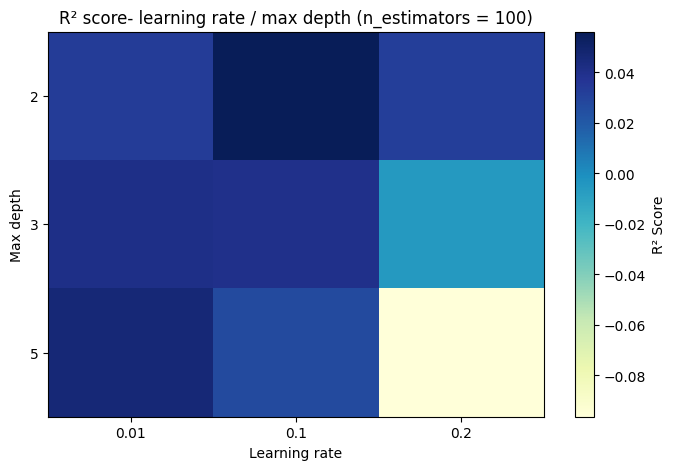

In [145]:
### GRAPH - HEATMAP

#filter so I am only including models with n_estimators = 100
results_100 = results_df[results_df['n_estimators'] == 100]

#create pivot table (rows = max_depth, columns = learning_rate, values = R² )
heatmap_data = results_100.pivot_table(
    index='max_depth',
    columns='learning_rate',
    values='R2'
)
plt.figure(figsize=(8, 5))
plt.imshow(heatmap_data, cmap='YlGnBu', aspect='auto')

plt.colorbar(label='R² Score')
plt.xticks(ticks=range(len(heatmap_data.columns)), labels=heatmap_data.columns)
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index)
plt.title("R² score- learning rate / max depth (n_estimators = 100)")
plt.xlabel("Learning rate")
plt.ylabel("Max depth")
plt.show()


In [146]:
### REGULARIZATION 

# implement regularization options
subsamples = [1.0, 0.8, 0.5]
min_samples_leaf_values = [1, 5, 10]

regularization_results = []

for subsample in subsamples:
    for min_leaf in min_samples_leaf_values:
        model = GradientBoostingRegressor(
            learning_rate=0.1,
            n_estimators=100,
            max_depth=3,
            subsample=subsample,
            min_samples_leaf=min_leaf,
            random_state=42
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        regularization_results.append({
            'subsample': subsample,
            'min_samples_leaf': min_leaf,
            'MSE': mse,
            'R2': r2
        })

#convert to DF
reg_results_df = pd.DataFrame(regularization_results)
reg_results_df_sorted = reg_results_df.sort_values(by='R2', ascending=False)
reg_results_df_sorted.head(10)


,subsample,min_samples_leaf,MSE,R2
2,1.0,10,0.048081,0.068841
4,0.8,5,0.048456,0.061596
1,1.0,5,0.048949,0.052046
3,0.8,1,0.048975,0.051536
7,0.5,5,0.049033,0.050414
5,0.8,10,0.049106,0.049007
8,0.5,10,0.049213,0.046929
6,0.5,1,0.049553,0.040337
0,1.0,1,0.049595,0.039527


### Observation: Regularization in GradientBoostingRegressor

I tested two key parameters:
- subsample (portion of training data used per tree): [1.0, 0.8, 0.5]
- min_samples_leaf (min # of samples per tree leaf): [1, 5, 10]

The best model achieved an R² score of 0.0688, with subsample = 1.0 and min_samples_leaf = 10.


This result is higher (i.e. it outperformed the previous models), Using min_samples_leaf = 10, forces each leaf node in the decision tree to have at least 10 samples; resulting in the model looking for more general patterns that apply to groups not individuals.


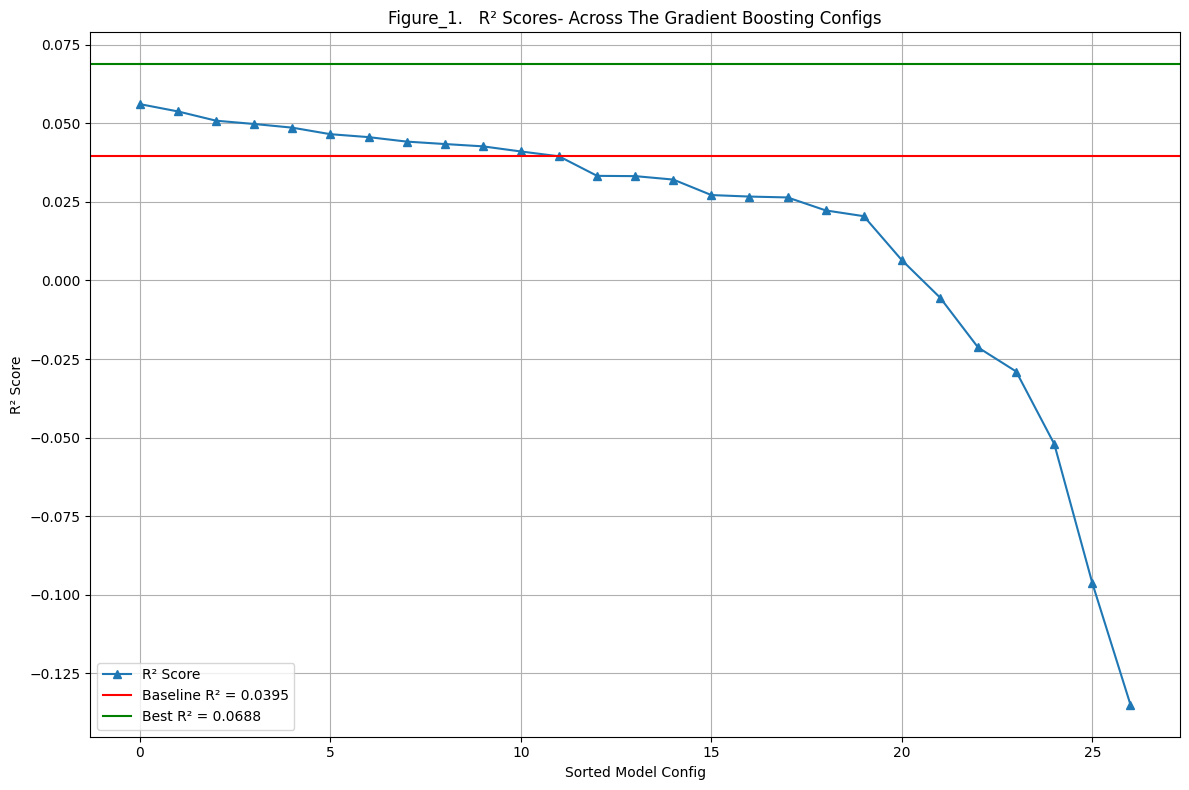

In [147]:
### GRAPH FOR REVIEW / CONCLUSION
### Line Plot of R² by Model Configuration
### Shows how performance improved across different models

#sort results by R2 for plotting
sorted_results = results_df_sorted.reset_index(drop=True)

plt.figure(figsize=(12, 8))
plt.plot(sorted_results['R2'], marker='^', label='R² Score')
plt.title("Figure_1.   R² Scores- Across The Gradient Boosting Configs")
plt.xlabel("Sorted Model Config")
plt.ylabel("R² Score")
plt.axhline(0.0395, color='red', linestyle='-', label='Baseline R² = 0.0395')
plt.axhline(0.0688, color='green', linestyle='-', label='Best R² = 0.0688')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##  Conclusion
In week 9, I used the Gradient Boosting supervised learning method with my capstone dataset, Home Credit Default Risk, to model early delinquency in mortgage lending. 

I focused on tuning key hyperparameters and analyzing their impact on the model performance by using the following methods: 
- Learning Rate: I tested values of 0.01, 0.1, and 0.2. A learning rate of 0.1 provided the best balance of accuracy and stability. Lower values required more estimators but reduced the risk of overfitting. A learning rate of 0.1 provided strong overall performance.
- Number of Estimators: More estimators (up to 200) generally improved performance, especially when paired with lower learning rates.The best results came from models using 100 estimators, especially when with a moderate learning rate. 
- Tree Depth: Shallow trees (depth = 2 or 3) helped prevent overfitting. Deeper trees (e.g., depth = 5) occasionally improved results but were more sensitive to noise
- Regularization: I used subsample and min_samples_leaf. This helped limit the model’s complexity. The best model used min_samples_leaf = 10 and subsample = 1.0, with the R²  score of 0.0688. This was the highest of all methods tested.
- Comparison: my baseline model (with 100 estimators, learning rate = 0.1, and depth = 3) achieved an R² score of only 0.0395. The final tuned model showed a clear improvement in performance of 0.0688.

My overall R² scores remain low. This aligns with expectations in credit risk modeling since default is unlikely and influenced by various factors. This output also aligns with previous weeks. 

Going through this activity and workbook helped me identify how key hyperparameters impact gradient boosting model output and overall performance. The results indicate that regularization and depth control can help the model improve and generalize better.

<b>Figure_1/Graph explanation above ^:</b>
- The blue line shows the R² scores for each gradient boosting model configuration tested, sorted from highest to lowest. 
- The red horizontal line marks the baseline model’s R² of 0.0395.
- The green line shows the best model’s R² of 0.0688 (used min_samples_leaf = 10 and subsample = 1.0).

This visualization highlights how tuning hyperparameters, including regularization and tree depth, can improve predictive performance.

### Thanks for reviewing! I look forward to your feedback. 